In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('titanic.csv')
X = df[['Pclass','Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = df['Survived']
X = pd.get_dummies(X,columns=['Sex'], drop_first=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

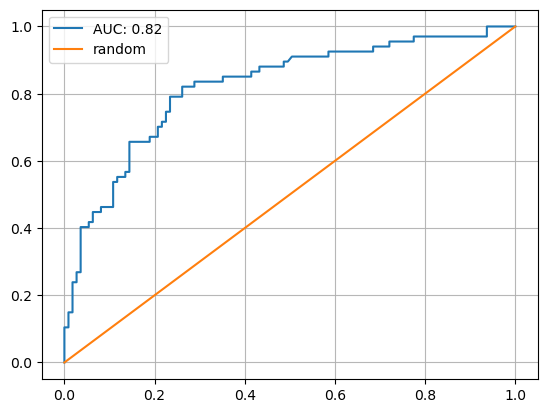

In [21]:
fpr,tpr,_ = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,label=f"AUC: {roc_auc_score(y_test,y_prob):.2f}")
plt.plot([0,1],[0,1], label='random')
plt.grid(alpha=0.9)
plt.legend()